In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
# for other available chart styles, run plt.style.available

In [2]:
data = pd.read_csv('Breweries.csv')

In [3]:
data.head()

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS
0,10101,Jardine,jard@gmail.com,trophy,150,200,725,145000,36250,Ghana,Southeast,January,2019
1,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018
2,10103,Sorvino,sorvi2000@gmail.com,castle lite,180,450,937,421650,252990,Togo,southsouth,March,2018
3,10104,Jones,jone.ai@yahoo.com,eagle lager,170,250,765,191250,61200,Benin,northwest,April,2018
4,10105,Andrews,andy@gmail.com,hero,150,200,836,167200,41800,Senegal,northeast,May,2017


In [4]:
#Declaring a figure, then setting size
fig = plt.figure(figsize=(10,10))

#This command displays the plt chart. Ony the figure information displays for now
plt.show()

<Figure size 720x720 with 0 Axes>

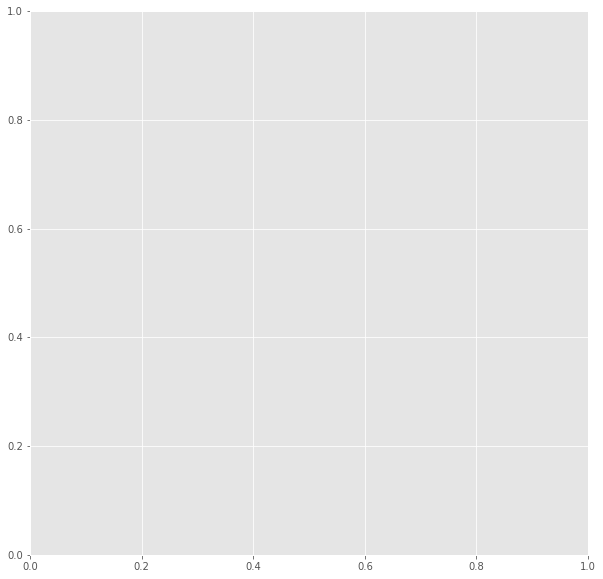

In [5]:
#Now we will add axes to the figure

fig = plt.figure(figsize=(10,10))
ax = plt.axes()

#Displaying again, we now have the axes
plt.show()

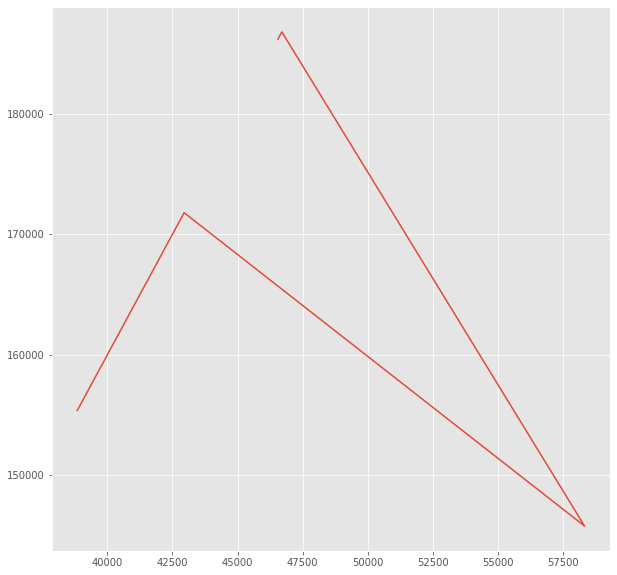

In [6]:
#Plotting

fig = plt.figure(figsize=(10,10))
ax = plt.axes()

#Plotting on the axes, will take random five customers for demonstration. random_state is for reproducibility
random_five = data.sample(5, random_state=1277)

ax.plot(random_five['PROFIT'],random_five['COST'])
plt.show()

In [7]:
#This is what we plotted above
random_five[['PROFIT','COST']]

,PROFIT,COST
749,46550,186200
312,46700,186800
307,58320,145800
578,42950,171800
109,38850,155400


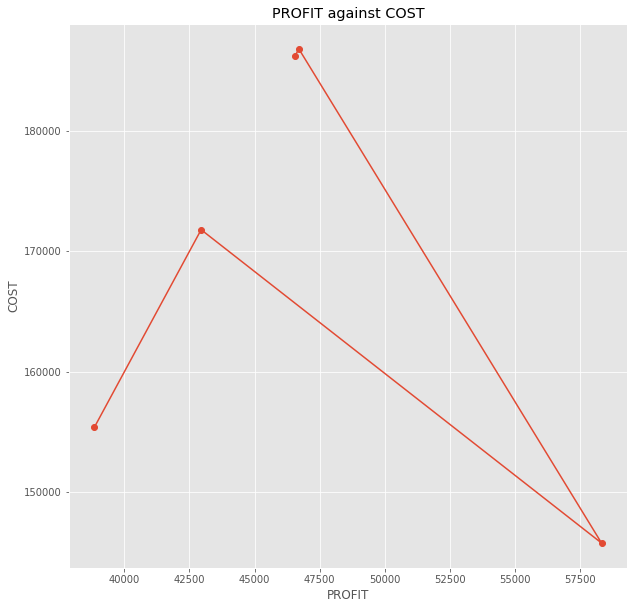

In [8]:
#But which axis is PROFIT, which is COST? We will lable the axes now to help us understand our chart better

fig = plt.figure(figsize=(10,10))
ax = plt.axes()

#Name x-axis
plt.xlabel('PROFIT')

#Name Y-axis
plt.ylabel('COST')

#Give chart a title
plt.title('PROFIT against COST')

#We can use plt instead of ax, it works fine too
plt.plot(random_five['PROFIT'],random_five['COST'],marker='o')

plt.show()

1. The above is called a line chart. We see straight lines joining the data points. We will create other charts too

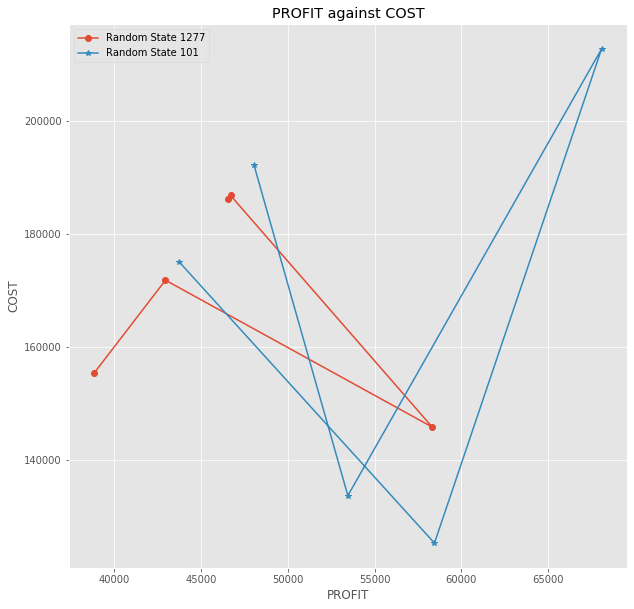

In [9]:
#We can also plot multiple charts on the same axes, will create another five random samples changing the random_state
random_five2 = data.sample(5, random_state=101)

plt.figure(figsize=(10,10))

#red color
plt.plot(random_five['PROFIT'],random_five['COST'],marker='o', label = 'Random State 1277')
#blue color
plt.plot(random_five2['PROFIT'],random_five2['COST'],marker='*', label = 'Random State 101')

plt.xlabel('PROFIT')
plt.ylabel('COST')
plt.title('PROFIT against COST')

#to distinguish the charts, it shows the label in plt.plot()
plt.legend()

plt.show()

2. Scatter plot = Instead of data points being joined by lines, the points are represented individually with a dot, or another shape using the 'marker'. Scatter plot compares the correlation between two continous variables (bivariate analysis)

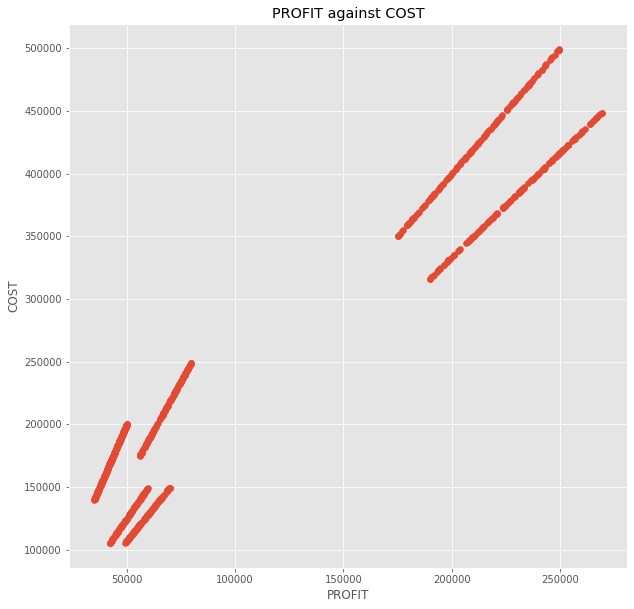

In [10]:
plt.figure(figsize=(10,10))
plt.xlabel('PROFIT')
plt.ylabel('COST')
plt.title('PROFIT against COST')
plt.scatter(data['PROFIT'],data['COST'])

plt.show()

Seeing a beautiful trend in the chart above, the gaps shows that there was no profit around 80000 and 170000, it can mean that we have two categories of brand: low profitable and high profitable. Also we see that COST is directly proportional to PROFIT,that is as COST increases, PROFIT increases, and viceversa

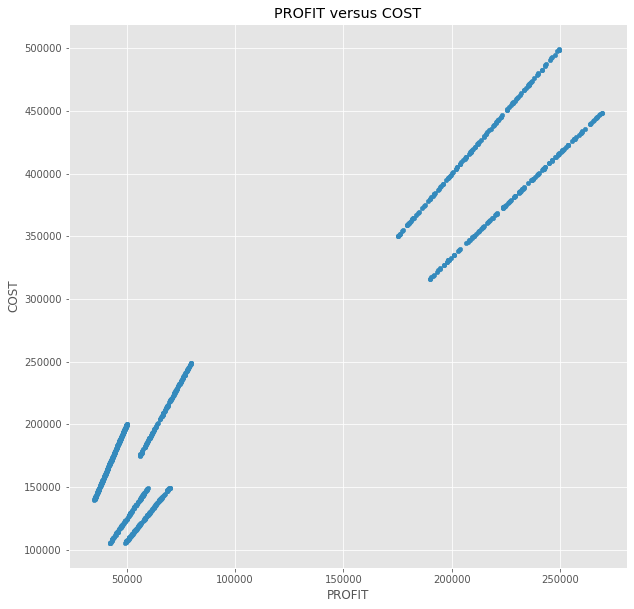

In [11]:
#we can also plot with pandas directly, specifying the kind of plot

data.plot(kind='scatter', x = 'PROFIT', y = 'COST', title = 'PROFIT versus COST', figsize = (10,10))

3. Histogram - It consist of rectangles with width equal to the interval and length proportional to the frequency of a variable

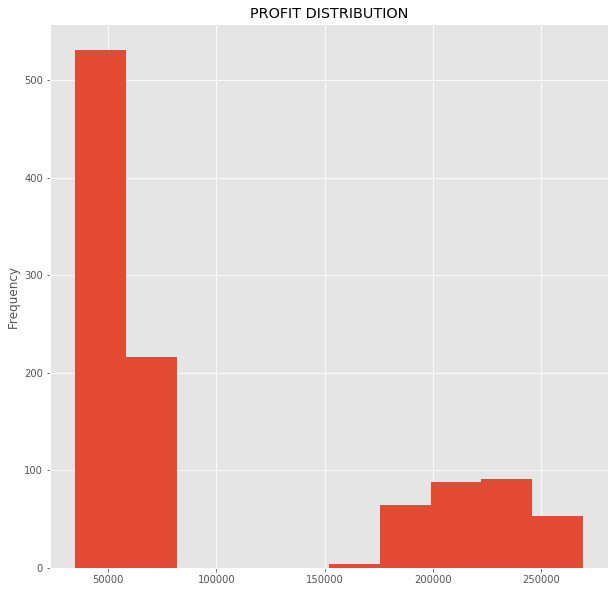

In [12]:
#using pandas directly, hist menans histogram. This is a univariate analysis(just one variable)

data['PROFIT'].plot(kind='hist', title = 'PROFIT DISTRIBUTION', figsize = (10,10))

Hisogram is useful for inspection of data for its shape, outliers, skewness etc

4. Barplot - Here the rectangle are not joined. Useful for distribution of data over several groups. This is univariate analysis(just one variable)

In [13]:
#first we do a value count of the variable to get the frequency for each group in the variable
countries_count = data['COUNTRIES'].value_counts()
countries_count

Nigeria    210
Ghana      210
Senegal    209
Togo       209
Benin      209
Name: COUNTRIES, dtype: int64

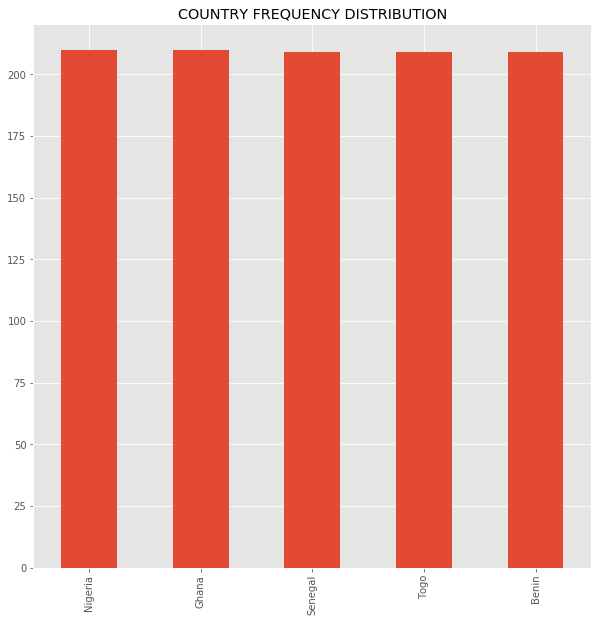

In [14]:
#Then we plot, bar means vertical bar chart
countries_count.plot(kind='bar',title = 'COUNTRY FREQUENCY DISTRIBUTION', figsize = (10,10))

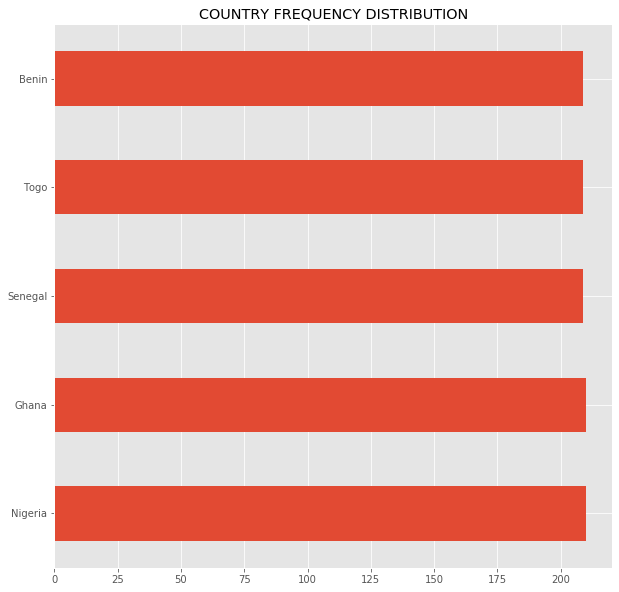

In [15]:
#barh means horizontal bar chart
countries_count.plot(kind='barh',title = 'COUNTRY FREQUENCY DISTRIBUTION', figsize = (10,10))

Dont confuse Bar plot with Histogram. Bar plot shows categorical data while Histogram shows numerical data. Also there is no gap between the bars, unlike in bar plots

5. Pie plot - Shows the fraction of a category as it contributes to the whole variable

In [16]:
#Let's use YEARS here
years_count = data['YEARS'].value_counts()
years_count

2017    374
2018    360
2019    313
Name: YEARS, dtype: int64

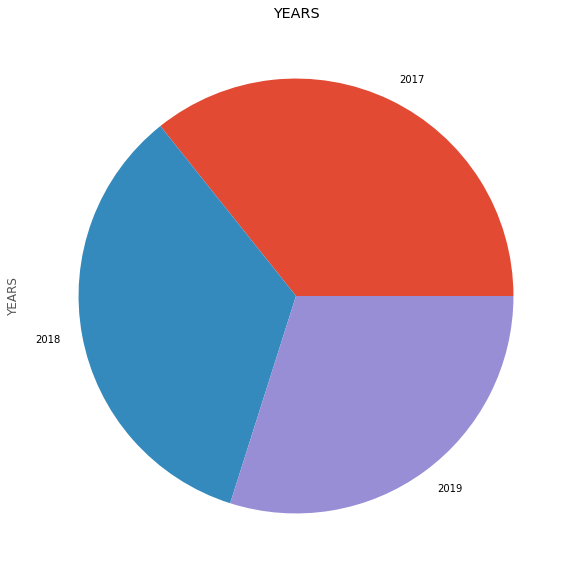

In [17]:
#Then plot, pie means pie chart
years_count.plot(kind='pie',title = 'YEARS', figsize = (10,10))

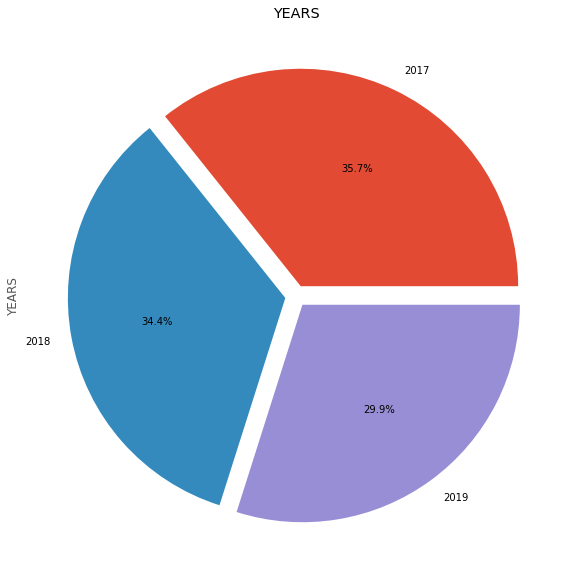

In [18]:
# Making it more interesting you can add addition parameters
# explode means space out the categories(the numbers in list must be equal to the number of variable values, 
# autopct means automatic percentage calculation
years_count.plot(kind='pie',title = 'YEARS', figsize = (10,10),explode=[0.05,0.05,0.05],autopct='%2.1f%%')

6. Boxplot - It displays as a chart the output from describe(). Blue box is interquartile range(75% - 25%), red bar is median(50%), lower and upper balck whiskers are minimum and maximum values

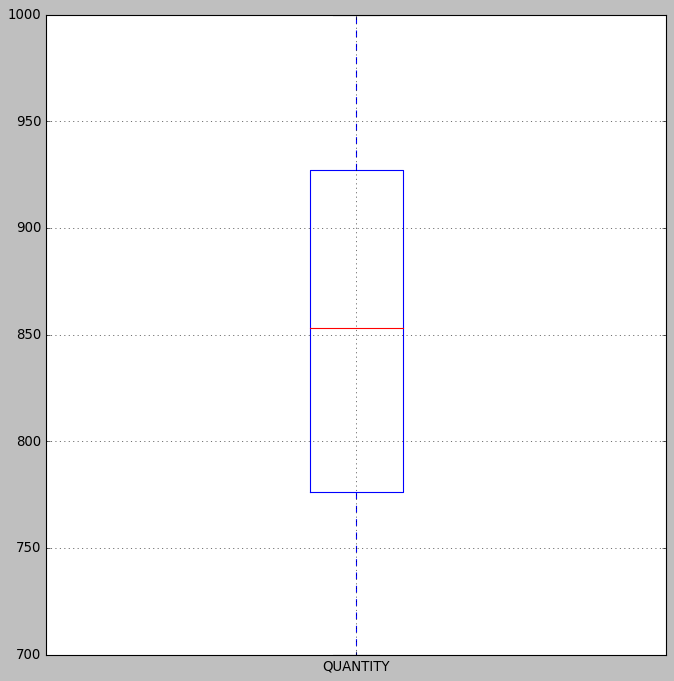

In [19]:
#Let's use anothe plt style for this
plt.style.use('classic')

data.boxplot(column = 'QUANTITY',figsize = (10,10))

In [20]:
#This is the describe() equivalent
data['QUANTITY'].describe()

count    1047.000000
mean      850.737345
std        86.991652
min       700.000000
25%       776.000000
50%       853.000000
75%       927.000000
max      1000.000000
Name: QUANTITY, dtype: float64

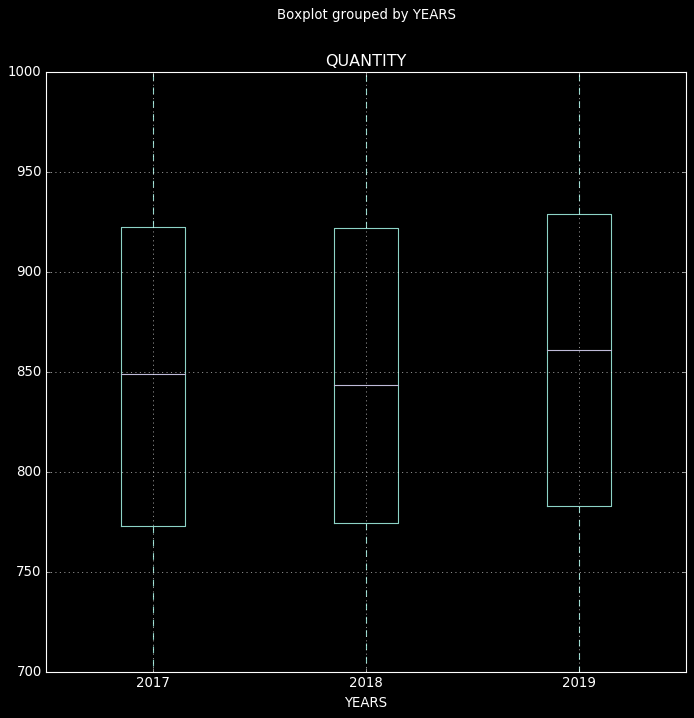

In [21]:
#Another style again, dark background
plt.style.use('dark_background')

#You can also use 'by'. It plots column by another column values,we use YEARS here see how we have for 2017,2018 and 2019
data.boxplot(column = 'QUANTITY', by = 'YEARS', figsize = (10,10))

What is the median quantity for each of the years above?

7. Kernel Density Estimation (KDE) plot - It shows density distribution for a variable

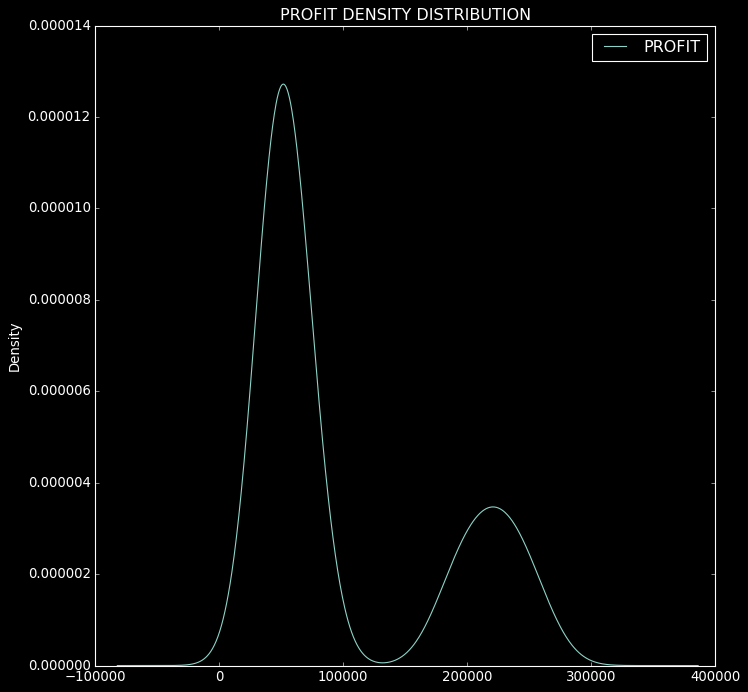

In [22]:
#You specify y which is the variable
data.plot(kind='kde',y='PROFIT', title = 'PROFIT DENSITY DISTRIBUTION', figsize = (10,10))

From the chart, we see that 0 to 100000 is more dense than the latter part, means we have more of the profits in this range

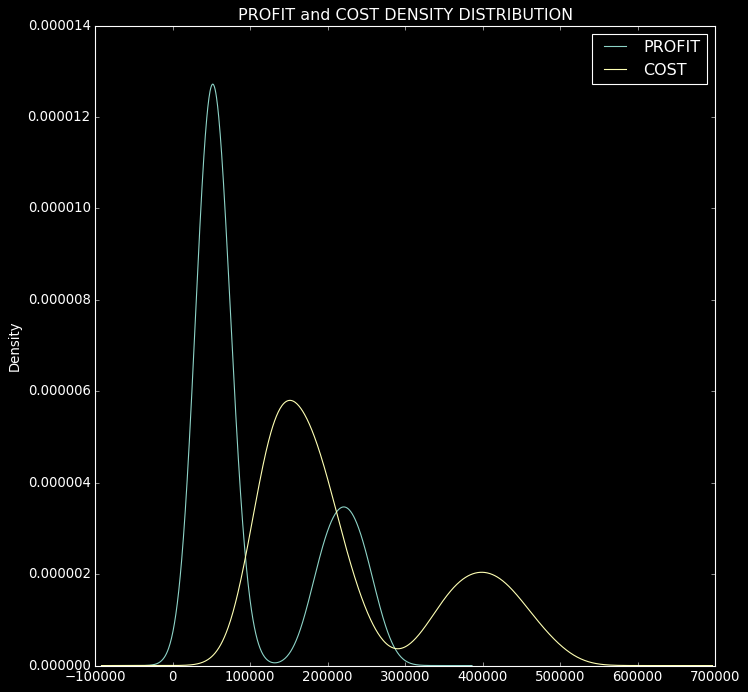

In [24]:
#You can plot multiple kde, sepcify axes(ax) to be same 
ax = plt.axes()
data.plot(kind='kde',y='PROFIT', title = 'PROFIT and COST DENSITY DISTRIBUTION', ax = ax, figsize = (10,10), label = 'PROFIT')
data.plot(kind='kde',y='COST', ax= ax, figsize = (10,10), label = 'COST')

Though matplotlib is the most common python visualization libray, there are other visualization libraries you can explore yourself like seaborn,bokeh,plotly